In [7]:
import tensorflow as tf
from tensorflow.keras.applications import Xception

In [8]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [10]:
# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [11]:
# Path to dataset (Ensure this is structured as train/class_name and val/class_name)
train_dir = "C:/Users/KIIT/Desktop/minor project/xception/train"
val_dir = "C:/Users/KIIT/Desktop/minor project/xception/val"

In [12]:
import os
print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))


Train directory exists: True
Validation directory exists: True


In [13]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical"
)
val_data = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical"
)

Found 2905 images belonging to 4 classes.
Found 322 images belonging to 4 classes.


In [14]:
# Load Pretrained Xception Model (Exclude the top layer)
base_model = Xception(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [15]:
# Freeze the base model
base_model.trainable = False

In [16]:
# Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(4, activation="softmax")  # 4 classes

In [17]:
# Define the model
model = Model(inputs=base_model.input, outputs=output_layer(x))

In [18]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


In [20]:
# Train the Model
history = model.fit(
    train_data, validation_data=val_data, epochs=10
)

Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 473s 5s/step - accuracy: 0.4953 - loss: 1.1556 - val_accuracy: 0.6584 - val_loss: 0.8020
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 405s 4s/step - accuracy: 0.6633 - loss: 0.8023 - val_accuracy: 0.7453 - val_loss: 0.7006
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 407s 4s/step - accuracy: 0.6806 - loss: 0.7729 - val_accuracy: 0.7516 - val_loss: 0.6609
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 471s 5s/step - accuracy: 0.7137 - loss: 0.6926 - val_accuracy: 0.7298 - val_loss: 0.6647
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 410s 5s/step - accuracy: 0.6935 - loss: 0.7014 - val_accuracy: 0.7484 - val_loss: 0.6289
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.7186 - loss: 0.6764 - val_accuracy: 0.7516 - val_loss: 0.6287
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 406s 4s/step - accuracy: 0.7254 - loss: 0.6678 - val_accuracy: 0.7516 - val_loss: 0.6236
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 428s 5s/step - accuracy: 0.7415 - loss: 0.6316 - val_accuracy: 0.7640 - v

In [21]:

# Save the model
model.save("disease_detection_xception.keras")


In [22]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Accuracy')

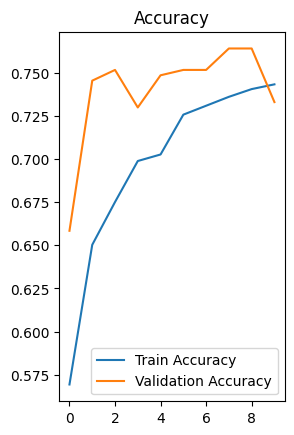

In [23]:
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")


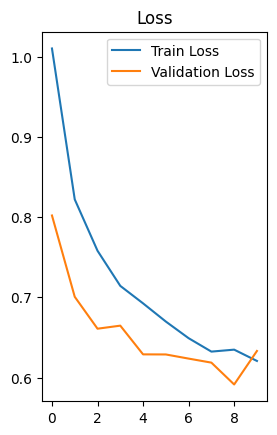

In [24]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")
plt.show()

In [25]:

# Evaluate the model on the test data
loss, accuracy = model.evaluate(val_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.7341 - loss: 0.6609
Test Accuracy: 73.29%


In [28]:
import numpy as np

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

In [31]:
# Generate Confusion Matrix
y_true = val_data.classes  # True labels

y_pred = []
y_prob = []
for images, _ in val_data:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_prob.extend(preds)
    if len(y_pred) >= val_data.samples:
        break  # Ensure we don't process extra samples

cm = confusion_matrix(y_true, y_pred)
class_names = list(val_data.class_indices.keys())

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


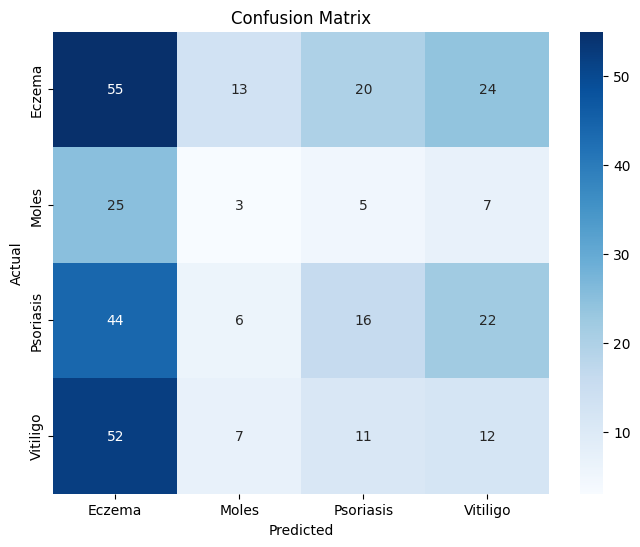

In [32]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

      Eczema       0.31      0.49      0.38       112
       Moles       0.10      0.07      0.09        40
   Psoriasis       0.31      0.18      0.23        88
    Vitiligo       0.18      0.15      0.16        82

    accuracy                           0.27       322
   macro avg       0.23      0.22      0.22       322
weighted avg       0.25      0.27      0.25       322



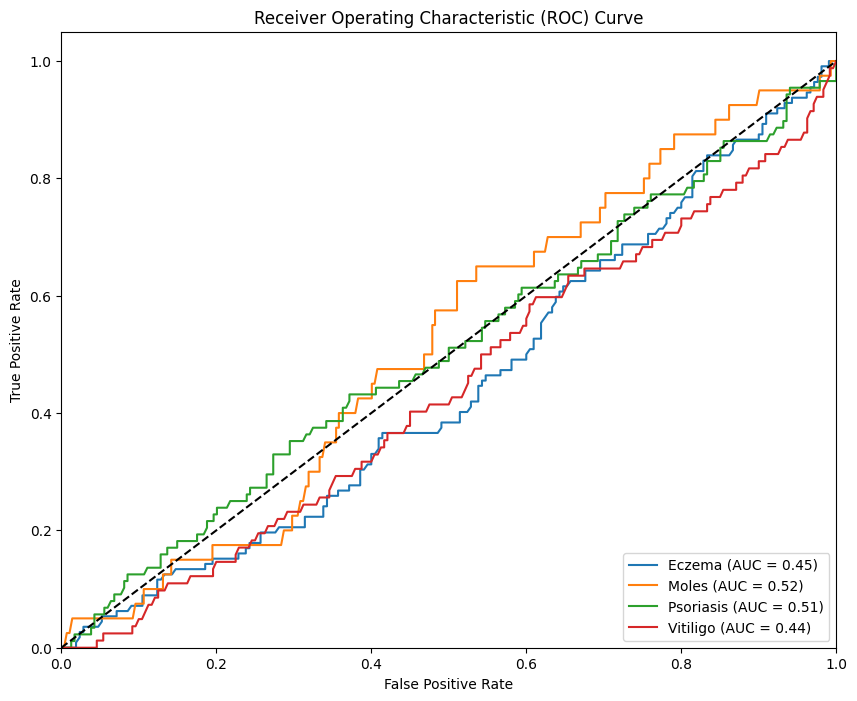

In [34]:
# ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(np.array(y_true) == i, np.array(y_prob)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [35]:
# Model Summary
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 24,014,902 (91.61 MB)

 Trainable params: 1,051,140 (4.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 2,102,282 (8.02 MB)